Probando la libreria de Python Fastf1 https://github.com/theOehrly/Fast-F1


Velocidad en el GP México de Sergio Pérez 11


In [23]:
import fastf1 as ff1
import numpy as np
import matplotlib as mpl
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
ff1.Cache.enable_cache('/tmp')  # Directorio local para cache


In [17]:
year = 2021
wknd = 18
ses = 'R'
driver = 'PER'
colormap = mpl.cm.Purples


In [8]:
session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_driver(driver).pick_fastest()
# Telemetria
x = lap.telemetry['X']
y = lap.telemetry['Y']
color = lap.telemetry['Speed']


core           INFO 	Loading data for Mexico City Grand Prix - Race [v2.2.9]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '11', '10', '16', '55', '5', '7', '14', '4', '99', '3', '31', '18', '77', '63', '6', '9', '47', '22']


In [9]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


In [26]:
print(lap)
# datos adicioneles sobre la vuelta a graficar


Time                      0 days 02:11:36.347000
DriverNumber                                  11
LapTime                   0 days 00:01:19.468000
LapNumber                                   49.0
Stint                                        2.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:28.161000
Sector2Time               0 days 00:00:30.759000
Sector3Time               0 days 00:00:20.548000
Sector1SessionTime        0 days 02:10:45.040000
Sector2SessionTime        0 days 02:11:15.799000
Sector3SessionTime        0 days 02:11:36.347000
SpeedI1                                    292.0
SpeedI2                                    283.0
SpeedFL                                    252.0
SpeedST                                    342.0
IsPersonalBest                              True
Compound                                    HARD
TyreLife                                     9.0
FreshTyre           

/home/brandonealr/.local/lib/python3.10/site-packages/fastf1/events.py:650: FutureWarning: The `Weekend.name` property is deprecated and will beremoved in a future version.
Use `Event['EventName']` or `Event.EventName` instead.
  warnings.warn(


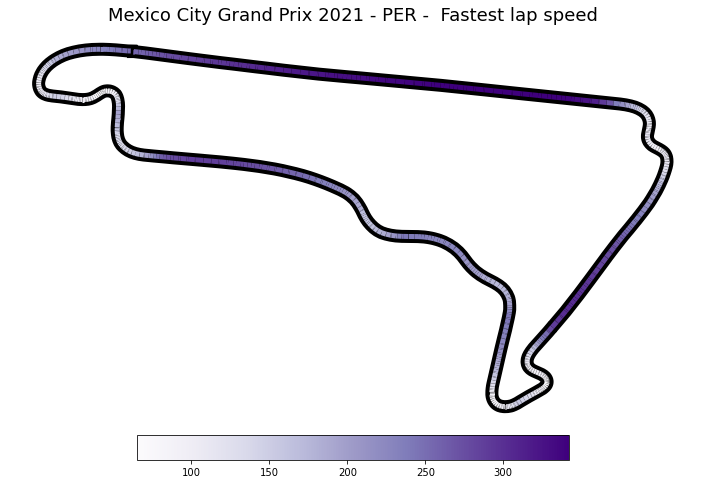

In [22]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 7))
fig.suptitle(
    f'{weekend.name} {year} - {driver} -  Fastest lap speed', size=18, y=0.95)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
        color='black', linestyle='-', linewidth=13, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(
    cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


# Show the plot
plt.show()
